In [47]:
import numpy as np
import pandas as pd

#Bibloteki do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

from sklearn.linear_model import LinearRegression

# Regresja liniowa

## Funkcje do generowania danych

Funkcja `np.random.rand` generuje tablice liczb z przediału od 0 do 1.
    
Funkcja `get_X()` zwraca tablice 100 liczb z przedziału od 0 do 2.
    
Będą to nasze `X`

Funkcja `np.random.randn` generuje tablice liczb z standaryzowanego rozkładu normalnego
    
Funkcja `get_y(X)` zwraca tablice 100 liczb z przedziału od 0 do 2
    
Będą to nasze `y`

In [48]:
def get_X():
    tablica = np.random.rand(100, 1)
    
    return 2 * tablica


def get_y(X):
    tablica = np.random.randn(100, 1)
    
    return 3 + 5 * X + tablica


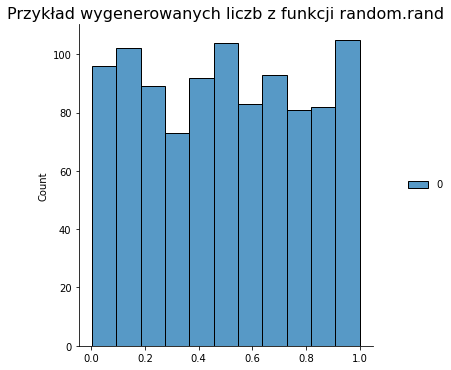

In [49]:
sns.displot(np.random.rand(1000, 1))
plt.title('Przykład wygenerowanych liczb z funkcji random.rand', size=16)
plt.show();

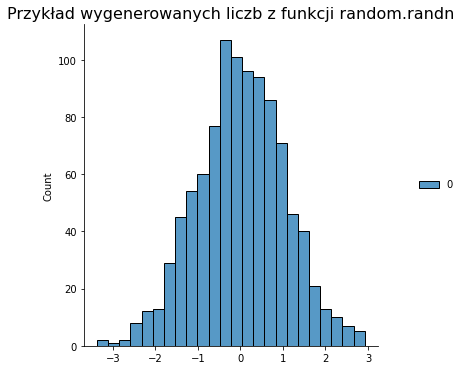

In [50]:
sns.displot(np.random.randn(1000, 1))
plt.title('Przykład wygenerowanych liczb z funkcji random.randn', size=16)
plt.show();

## Generowanie danych

In [51]:
X = get_X()
y = get_y(X)

In [52]:
# Kopie danych
X_wykres = X.copy()
y_wykres = y.copy()

## Wykres punktowy danych

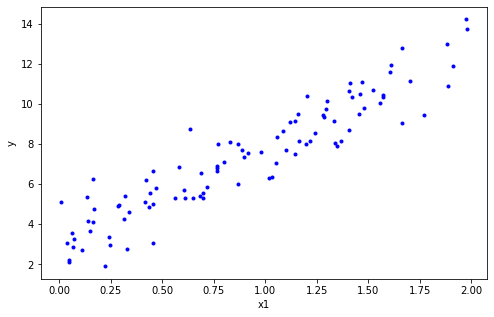

In [53]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.show()

# Regresja liniowa z biboteki Scikit-Learn

### Inicjalizujemy model Regresji liniowej z biboteki Scikit-Learn

In [54]:
lin_reg = LinearRegression()

### Trenujemy model na wygenerowanych danych

In [55]:
lin_reg.fit(X, y)

LinearRegression()

In [56]:
print("Równanie prostej regresji wynosi:\ny = {:.2f} + {:.2f}x".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

Równanie prostej regresji wynosi:
y = 3.01 + 4.81x


### Rysuje prostą regresji na danych 

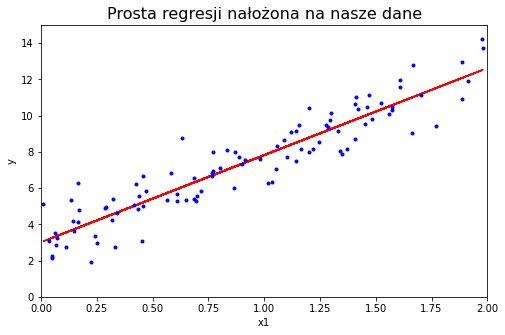

In [57]:
lin_y = lin_reg.predict(X)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, lin_y, 'r-')
plt.plot(X, y, 'b.')
plt.title('Prosta regresji nałożona na nasze dane', size=16)
plt.axis([0, 2, 0, 15])
plt.show()

# Regresja liniowa od zera

## Przekształcamy nasze pod operacje macierzowe

In [58]:
X = np.hstack((np.ones((X.shape[0],1)), X))
y = np.reshape(y, (100,1))

## Funkcja hipotezy
Służy ona do wyliczania wartość przewidywanych - y dla obecnych parametrów theta

![funkcja_hipotezy](images/Funkcja_hipotezy.png)

In [59]:
def h(x,theta):
    return np.dot(x, theta)

## Funkcja kosztu:
Wykorzystuje się ją do oceniania jakości naszego modelu

W tym przypadku jest to średni bład kwadratowy (`MSE`)

![funkcja_kosztu](images/funkcja_kosztu.png)

In [60]:
def funkcja_kosztu(X, y, theta):
    m = y.shape[0]
    err = h(X, theta) - y
    return 1/(2*m) * np.dot(err.T, err)

Dodatkowo będzie nam potrzebna pochodna cząstkowej funkcji kosztu.

Jest ona wykorzystana przy liczeniu kroku gradientu prostego

In [61]:
def pochodna_funkcji_kosztu(X, y, theta):
    m = y.shape[0]
    err = h(X, theta) - y
    return (1/m) * np.dot(X.T, err)

In [62]:
def rysuj_koszt(costs, liczba_krokow):
    costs = [x[0][0] for x in costs] 
    plt.figure(figsize=(15,8))
    plt.xlabel('Liczba kroków')
    plt.ylabel('Funckja kosztu')
    sns.lineplot(x=np.array(range(liczba_krokow)), y=costs, linewidth = "5", color ='m')
    plt.title('Wykres funkcji kosztu wzgledem ilości kroków', size=16)
    plt.show()

## Algorytm wsadowy gradientu prostego
Każdy parametr (theta) aktualizuję obliczając pochodną cząstkową `funkcji kosztu` pomnożoną przez `wspolczynik_uczenia`

![Algorytm_gradientu_prostego](images/Algorytm_gradientu_prostego.png)

`Liczba kroków` oznacza liczbę iteracji aktualizacji parametrów `theta`.

Im więcej tym bliżej dojdziemy do minimum globalnego funkcji kosztu.

In [63]:
def metoda_wsadowego_gradientu_prostego(x, y, theta, wspolczynik_uczenia=0.1, liczba_krokow=10):
    costs = []
    thetas = [theta]
    for i in range(liczba_krokow):
        koszt = funkcja_kosztu(X, y, theta)
        theta = theta - (wspolczynik_uczenia * pochodna_funkcji_kosztu(X, y, theta))
        
        costs.append(koszt)
        thetas.append(theta)
        
    return thetas, costs

In [64]:
theta = np.zeros((X.shape[1], 1))
wspolczynik_uczenia = 0.1
liczba_krokow = 200

thetas, costs = metoda_wsadowego_gradientu_prostego(X, y, theta, wspolczynik_uczenia, liczba_krokow)
theta = thetas[-1]

print("Gradient Descent: y = {:.2f} + {:.2f}x".format(theta[0][0], theta[1][0]))

Gradient Descent: y = 3.05 + 4.77x


## Funkcja kosztu stopniowo maleje w każdej następnym kroku gradientu prostego

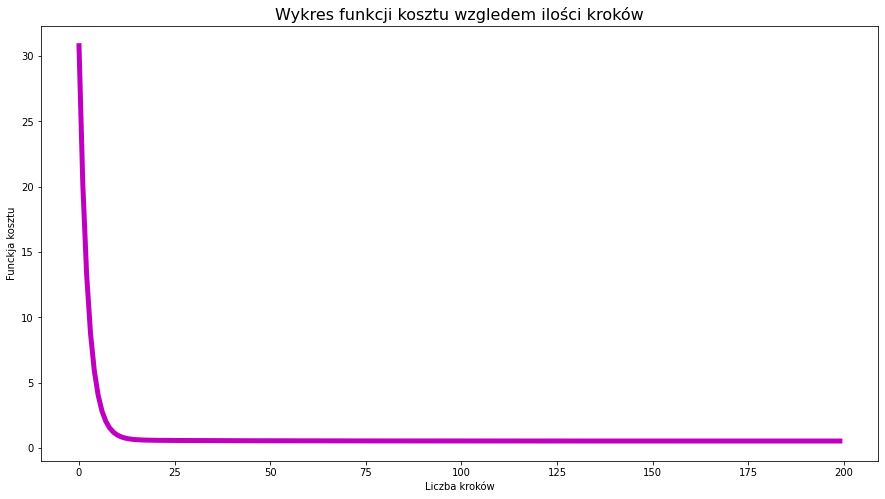

In [65]:
rysuj_koszt(costs, liczba_krokow)

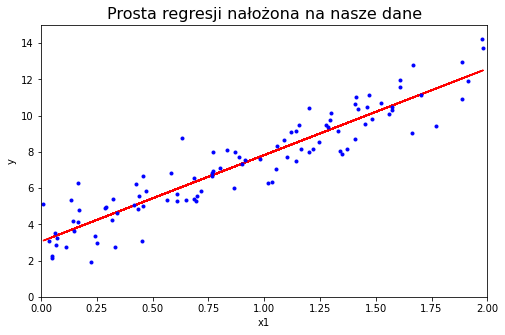

In [66]:
lin_y = h(X, theta)

plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X_wykres, lin_y, 'r-')
plt.plot(X_wykres, y, 'b.')
plt.title('Prosta regresji nałożona na nasze dane', size=16)
plt.axis([0, 2, 0, 15])
plt.show()

In [67]:
fig = plt.figure(figsize=(12, 7))
ax = plt.axes()
plt.title('Wykres prostej regresji zmieniający się podczas trenowania')
plt.scatter(X_wykres, y, color='r')
line, = ax.plot([], [], lw=2)
annotation = ax.text(0, 14, s='')
annotation.set_animated(True)
plt.close()

def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

def animate(i):
    x = np.linspace(0, 2, 100)
    y = thetas[i][1]*x + thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.3f' % (costs[i]))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=0, blit=True)

In [68]:
anim.save('animation.gif', writer='imagemagick', fps = 30)


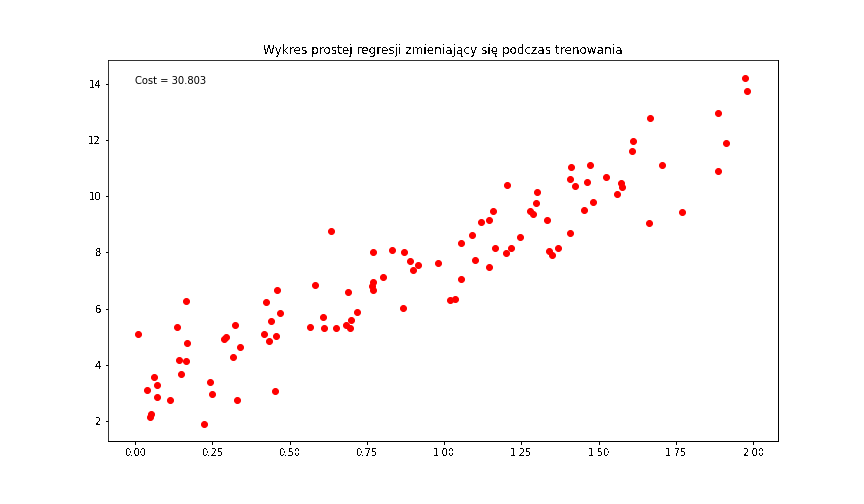

In [69]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# Metoda najmniejszych kwadratów

In [70]:
X_srednia = np.mean(X_wykres)
y_srednia = np.mean(y_wykres)
n = len(X)
licznik = 0
mianownik = 0

for i in range(n):
    licznik += (X_wykres[i] - X_srednia) * (y_wykres[i] - y_srednia)
    mianownik += (X_wykres[i] - X_srednia) ** 2
    
b1 = licznik / mianownik
b0 = y_srednia - (b1 * X_srednia)
print(b0, b1)

[3.012791] [4.80526722]


# Regresja liniowa równanie normalne

In [71]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_best)

[[3.012791  ]
 [4.80526722]]


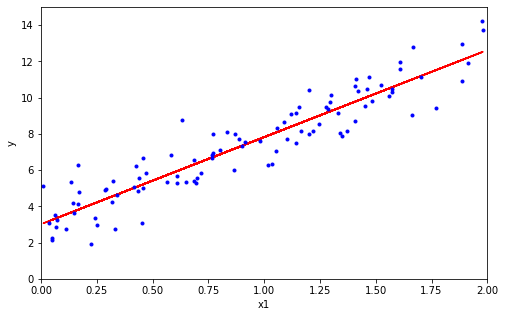

In [72]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X_wykres, h(X, theta_best), 'r-')
plt.plot(X_wykres, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()